In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [225]:
def clean_data(path = "/home/raflicky/Desktop/BMV_DATA"):
    files = (os.listdir(path))
    merged_list = []
    for file in files:
        stock_price = pd.read_csv(path + "/" + file)
        if stock_price.shape == (1257,7):
            stock_price = stock_price.drop(['Date', 'Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
            merged_list.append(stock_price)
    df = pd.concat(merged_list, axis = 1)
    return df

In [226]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [227]:
my_data = clean_data("/home/raflicky/Desktop/BMV_DATA")
my_data2 = clean_data("/home/raflicky/Desktop/IPC_DATA")

In [228]:
trainingX, trainingY = next_batch(my_data, my_data2, 900, 22)
testingX, testingY = next_batch(my_data, my_data2, 100, 22)

In [230]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [237]:
# design network
model = Sequential()
model.add(LSTM(1000, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dense(1))

Train on 899 samples, validate on 99 samples
Epoch 1/7
 - 7s - loss: 45121.1317 - val_loss: 41252.6533
Epoch 2/7
 - 6s - loss: 45108.3669 - val_loss: 41240.6578
Epoch 3/7
 - 6s - loss: 45096.5494 - val_loss: 41229.0625
Epoch 4/7
 - 6s - loss: 45084.9894 - val_loss: 41217.6063
Epoch 5/7
 - 6s - loss: 45073.5295 - val_loss: 41206.2212
Epoch 6/7
 - 6s - loss: 45062.1226 - val_loss: 41194.8752
Epoch 7/7
 - 6s - loss: 45050.7473 - val_loss: 41183.5565


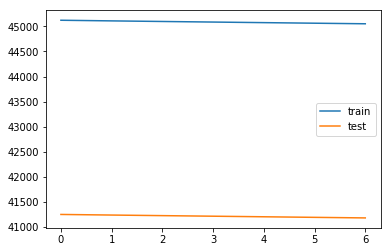

In [238]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=7, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()